# Strategy and Performance Management - Fall 2022 - Group Project
## H&M Customer Segmentation and Strategies: Segment Clustering
### Group 6: Thi Anh Ba Dang, Eduardo Garcia, Thu Lam, Carla Weidner

## Imports

To start, import the following packages

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## K Means

The final_results_v3.csv file is the output of the Churn Model notebook. If it is impoorted as a .zip file, unzip it with the code below, if it is imported as a .csv file, skip the unzip code.

In [ ]:
!unzip -qq final_results_v3.csv.zip

replace final_results_v3.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._final_results_v3.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Read & store the churn model dataframe. Remove unnecessary column and print the info to show a summary of what is contained in this df.

In [ ]:
df_churn = pd.read_csv('final_results_v3.csv')
df_churn.drop("Unnamed: 0", axis=1, inplace=True)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   customer_id     1371980 non-null  object 
 1   churn_proba_3M  1371980 non-null  float64
 2   churn_proba_6M  1371980 non-null  float64
dtypes: float64(2), object(1)
memory usage: 31.4+ MB


The df_cust_new.csv file is the output of the Data Preparation notebook. If it is impoorted as a .zip file, unzip it with the code below, if it is imported as a .csv file, skip the unzip code.

In [ ]:
!unzip -qq df_cust_new3.csv.zip

replace __MACOSX/._df_cust_new3.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


Read & store the cust_new dataframe. Merge it with the churn dataframe on the customer_id column. Then, create a kmeans data frame with only the columns necessary for clustering.

In [ ]:
df_cust_new = pd.read_csv('df_cust_new3.csv')
df_cust_new['total_spent_norm'] = (df_cust_new['total_spent'] - df_cust_new['total_spent'].min())/(df_cust_new['total_spent'].max() - df_cust_new['total_spent'].min())
df_cust_new = pd.merge(df_cust_new, df_churn, on=['customer_id','customer_id'], how='left')
df_kmeans = df_cust_new[['churn_proba_3M', 'total_spent_norm', 'perc_instore']]
df_kmeans.fillna(0)
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371980 entries, 0 to 1371979
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   churn_proba_3M    1371980 non-null  float64
 1   total_spent_norm  1371980 non-null  float64
 2   perc_instore      1371980 non-null  float64
dtypes: float64(3)
memory usage: 41.9 MB


### Finding Optimal Number of Clusters: Elbow Plot

Next, we run kmeans clustering with a maximum number of clusters. This code will run kmeans models from 1 to 10 clusters. From the elbow plot we can detect what the optimal number of clusters of the model is.

In [ ]:
max_k = 10

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


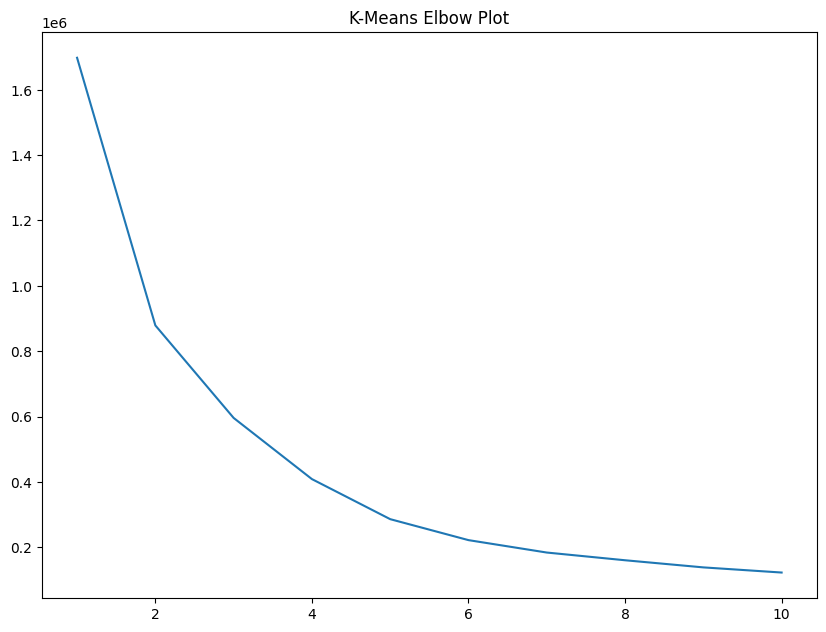

In [ ]:
inertia=[]
for k in range(1, max_k+1):
    model = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    model.fit(df_kmeans)
    inertia.append(model.inertia_)
sns.lineplot(range(1, max_k+1), inertia)
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('K-Means Elbow Plot')
plt.show()

The optimal number of clusters based on the graph is 4. It can be determined by the location of the 'elbow' in the graph.

### Clustering with Optimal Clusters
Here we re-run the model with the defined number of clusters.

In [ ]:
model_1 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
model_1.fit(df_kmeans)
y_pred = model_1.fit_predict(df_kmeans)

### Adding Labels to Customer Data

Next, we add the cluster labels to the dataset. 

In [ ]:
df_cust_new["clusters"] = model_1.labels_
df_cust_new.head()

,customer_id,FN,Active,age,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,fashion_news_frequency_Regularly,num_instore,...,price_divided,price_ladies_acc,price_ladies,price_lingeries,price_mens,price_sport,total_spent_norm,churn_proba_3M,churn_proba_6M,clusters
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,49.0,1,0,0,0,0,9.0,...,0.052932,0.000000,0.440559,0.000000,0.035576,0.000000,0.011252,0.458544,0.401635,3
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,25.0,1,0,0,0,0,5.0,...,0.826797,0.230407,0.603051,0.829898,0.000000,0.022017,0.045113,0.081589,0.010196,1
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,24.0,1,0,0,0,0,0.0,...,0.030492,0.000000,0.225322,0.201593,0.186373,0.061000,0.012220,0.375922,0.248316,1
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,54.0,1,0,0,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.060983,0.001057,0.897181,0.817560,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,52.0,1,0,0,0,1,2.0,...,0.000000,0.000000,0.246085,0.169407,0.000000,0.054203,0.008144,0.349701,0.203179,1


## Statistical Analysis

Here we define new data frames for each of the clusters in order to perform the statistical analysis.

In [ ]:
from scipy import stats

In [ ]:
df_c0 = df_cust_new[df_cust_new['clusters']==0]
df_c1 = df_cust_new[df_cust_new['clusters']==1]
df_c2 = df_cust_new[df_cust_new['clusters']==2]
df_c3 = df_cust_new[df_cust_new['clusters']==3]

### Percent in Store

In [ ]:
t_01_perc, p_01_perc = stats.ttest_ind(df_c0.dropna()['perc_instore'],df_c1.dropna()['perc_instore'], equal_var=False)
print('% in Store 0/1', round(t_01_perc, 3), round(p_01_perc, 10))
t_02_perc, p_02_perc = stats.ttest_ind(df_c0.dropna()['perc_instore'],df_c2.dropna()['perc_instore'], equal_var=False)
print('% in Store 0/2', round(t_02_perc, 3), round(p_02_perc, 10))
t_03_perc, p_03_perc = stats.ttest_ind(df_c0.dropna()['perc_instore'],df_c3.dropna()['perc_instore'], equal_var=False)
print('% in Store 0/3', round(t_03_perc, 3), round(p_03_perc, 10))
t_12_perc, p_12_perc = stats.ttest_ind(df_c1.dropna()['perc_instore'],df_c2.dropna()['perc_instore'], equal_var=False)
print('% in Store 1/2', round(t_12_perc, 3), round(p_12_perc, 10))
t_13_perc, p_13_perc = stats.ttest_ind(df_c1.dropna()['perc_instore'],df_c3.dropna()['perc_instore'], equal_var=False)
print('% in Store 1/3', round(t_13_perc, 3), round(p_13_perc, 10))
t_23_perc, p_23_perc = stats.ttest_ind(df_c2.dropna()['perc_instore'],df_c3.dropna()['perc_instore'], equal_var=False)
print('% in Store 2/3', round(t_23_perc, 3), round(p_03_perc, 10))

% in Store 0/1 2277.079 0.0
% in Store 0/2 3502.399 0.0
% in Store 0/3 499.41 0.0
% in Store 1/2 333.244 0.0
% in Store 1/3 -1066.472 0.0
% in Store 2/3 -1415.393 0.0


Summary of % In Store: 

Assuming an alpha of 0.05 - in all cases, the p-value is less than alpha. Due to this, we reject the null hpyothesis & it can be concluded that there is a significant difference in the mean of % of in store purchases between the clusters.

In [ ]:
df_cust_new.groupby('clusters')['perc_instore'].mean()

clusters
0    0.939276
1    0.128897
2    0.031941
3    0.686618
Name: perc_instore, dtype: float64

### Number of Transactions (total, not grouped)

In [ ]:
t_01_tt, p_01_tt = stats.ttest_ind(df_c0.dropna()['total_trans'],df_c1.dropna()['total_trans'], equal_var=False)
print('Num Transactions 0/1', round(t_01_tt, 3), round(p_01_tt, 3))
t_02_tt, p_02_tt = stats.ttest_ind(df_c0.dropna()['total_trans'],df_c2.dropna()['total_trans'], equal_var=False)
print('Num Transactions 0/2', round(t_02_tt, 3), round(p_02_tt, 3))
t_03_tt, p_03_tt = stats.ttest_ind(df_c0.dropna()['total_trans'],df_c3.dropna()['total_trans'], equal_var=False)
print('Num Transactions 0/3', round(t_03_tt, 3), round(p_03_tt, 3))
t_12_tt, p_12_tt = stats.ttest_ind(df_c1.dropna()['total_trans'],df_c2.dropna()['total_trans'], equal_var=False)
print('Num Transactions 1/2', round(t_12_tt, 3), round(p_12_tt, 3))
t_13_tt, p_13_tt = stats.ttest_ind(df_c1.dropna()['total_trans'],df_c3.dropna()['total_trans'], equal_var=False)
print('Num Transactions 1/3', round(t_13_tt, 3), round(p_13_tt, 3))
t_23_tt, p_23_tt = stats.ttest_ind(df_c2.dropna()['total_trans'],df_c3.dropna()['total_trans'], equal_var=False)
print('Num Transactions 2/3', round(t_23_tt, 3), round(p_03_tt, 3))


Num Transactions 0/1 -447.343 0.0
Num Transactions 0/2 -37.134 0.0
Num Transactions 0/3 -402.646 0.0
Num Transactions 1/2 441.173 0.0
Num Transactions 1/3 206.924 0.0
Num Transactions 2/3 -390.746 0.0


Summary of Num Transactions: 

Assuming an alpha of 0.05 - in all cases, the p-value is less than alpha. Due to this, we reject the null hpyothesis & it can be concluded that there is a significant difference in the mean # of transactions between the clusters.

In [ ]:
df_cust_new.groupby('clusters')['total_trans'].mean()

clusters
0     8.358979
1    70.172669
2     9.173265
3    38.063278
Name: total_trans, dtype: float64

### Price of Transactions

In [ ]:
t_01_pt, p_01_pt = stats.ttest_ind(df_c0.dropna()['total_spent'],df_c1.dropna()['total_spent'], equal_var=False)
print('Price of Transactions 0/1', round(t_01_pt, 3), round(p_01_pt, 3))
t_02_pt, p_02_pt = stats.ttest_ind(df_c0.dropna()['total_spent'],df_c2.dropna()['total_spent'], equal_var=False)
print('Price of Transactions 0/2', round(t_02_pt, 3), round(p_02_pt, 3))
t_03_pt, p_03_pt = stats.ttest_ind(df_c0.dropna()['total_spent'],df_c3.dropna()['total_spent'], equal_var=False)
print('Price of Transactions 0/3', round(t_03_pt, 3), round(p_03_pt, 3))
t_12_pt, p_12_pt = stats.ttest_ind(df_c1.dropna()['total_spent'],df_c2.dropna()['total_spent'], equal_var=False)
print('Price of Transactions 1/2', round(t_12_pt, 3), round(p_12_pt, 3))
t_13_pt, p_13_pt = stats.ttest_ind(df_c1.dropna()['total_spent'],df_c3.dropna()['total_spent'], equal_var=False)
print('Price of Transactions 1/3', round(t_13_pt, 3), round(p_13_pt, 3))
t_23_pt, p_23_pt = stats.ttest_ind(df_c2.dropna()['total_spent'],df_c3.dropna()['total_spent'], equal_var=False)
print('Price of Transactions 2/3', round(t_23_pt, 3), round(p_03_pt, 3))

Price of Transactions 0/1 -424.674 0.0
Price of Transactions 0/2 -97.428 0.0
Price of Transactions 0/3 -388.594 0.0
Price of Transactions 1/2 408.322 0.0
Price of Transactions 1/3 236.263 0.0
Price of Transactions 2/3 -347.332 0.0


Summary of Price of Transactions: 

Assuming an alpha of 0.05 - in all cases, the p-value is less than alpha. Due to this, we reject the null hpyothesis & it can be concluded that there is a significant difference in the mean $ of transactions between the clusters.

In [ ]:
df_cust_new.groupby('clusters')['total_spent'].mean()

clusters
0    0.199789
1    2.059253
2    0.264136
3    0.938443
Name: total_spent, dtype: float64

### Churn Prediction 3 Month

In [ ]:
t_01_churn3, p_01_churn3 = stats.ttest_ind(df_c0['churn_proba_3M'],df_c1['churn_proba_3M'], equal_var=False)
print('Churn3 0/1', round(t_01_churn3, 3), round(p_01_churn3, 3))
t_02_churn3, p_02_churn3 = stats.ttest_ind(df_c0['churn_proba_3M'],df_c2['churn_proba_3M'], equal_var=False)
print('Churn3 0/2', round(t_02_churn3, 3), round(p_02_churn3, 3))
t_03_churn3, p_03_churn3 = stats.ttest_ind(df_c0['churn_proba_3M'],df_c3['churn_proba_3M'], equal_var=False)
print('Churn3 0/3', round(t_03_churn3, 3), round(p_03_churn3, 3))
t_12_churn3, p_12_churn3 = stats.ttest_ind(df_c1['churn_proba_3M'],df_c2['churn_proba_3M'], equal_var=False)
print('Churn3 1/2', round(t_12_churn3, 3), round(p_12_churn3, 3))
t_13_churn3, p_13_churn3 = stats.ttest_ind(df_c1['churn_proba_3M'],df_c3['churn_proba_3M'], equal_var=False)
print('Churn3 1/3', round(t_13_churn3, 3), round(p_13_churn3, 3))
t_23_churn3, p_23_churn3 = stats.ttest_ind(df_c2['churn_proba_3M'],df_c3['churn_proba_3M'], equal_var=False)
print('Churn3 2/3', round(t_23_churn3, 3), round(p_03_churn3, 3))

Churn3 0/1 1523.303 0.0
Churn3 0/2 9.769 0.0
Churn3 0/3 922.596 0.0
Churn3 1/2 -1597.074 0.0
Churn3 1/3 -233.032 0.0
Churn3 2/3 946.623 0.0


Summary:

In [ ]:
df_cust_new.groupby('clusters')['churn_proba_3M'].mean()

clusters
0    0.809976
1    0.237102
2    0.807781
3    0.366487
Name: churn_proba_3M, dtype: float64

### Churn Prediction 6 Month

In [ ]:
t_01_churn6, p_01_churn6 = stats.ttest_ind(df_c0['churn_proba_6M'],df_c1['churn_proba_6M'], equal_var=False)
print('Churn6 0/1', round(t_01_churn6, 3), round(p_01_churn6, 3))
t_02_churn6, p_02_churn6 = stats.ttest_ind(df_c0['churn_proba_6M'],df_c2['churn_proba_6M'], equal_var=False)
print('Churn6 0/2', round(t_02_churn6, 3), round(p_02_churn6, 3))
t_03_churn6, p_03_churn6 = stats.ttest_ind(df_c0['churn_proba_6M'],df_c3['churn_proba_6M'], equal_var=False)
print('Churn6 0/3', round(t_03_churn6, 3), round(p_03_churn6, 3))
t_12_churn6, p_12_churn6 = stats.ttest_ind(df_c1['churn_proba_6M'],df_c2['churn_proba_6M'], equal_var=False)
print('Churn6 1/2', round(t_12_churn6, 3), round(p_12_churn6, 3))
t_13_churn6, p_13_churn6 = stats.ttest_ind(df_c1['churn_proba_6M'],df_c3['churn_proba_6M'], equal_var=False)
print('Churn6 1/3', round(t_13_churn6, 3), round(p_13_churn6, 3))
t_23_churn6, p_23_churn6 = stats.ttest_ind(df_c2['churn_proba_6M'],df_c3['churn_proba_6M'], equal_var=False)
print('Churn6 2/3', round(t_23_churn6, 3), round(p_03_churn6, 3))

Churn6 0/1 1470.159 0.0
Churn6 0/2 68.618 0.0
Churn6 0/3 923.563 0.0
Churn6 1/2 -1502.486 0.0
Churn6 1/3 -231.502 0.0
Churn6 2/3 910.346 0.0


In [ ]:
df_cust_new.groupby('clusters')['churn_proba_6M'].mean()

clusters
0    0.703129
1    0.137715
2    0.679761
3    0.253694
Name: churn_proba_6M, dtype: float64

## Plotting Clusters

In [ ]:
df_cust_new['clusters_str'] = df_cust_new['clusters'].astype(str)

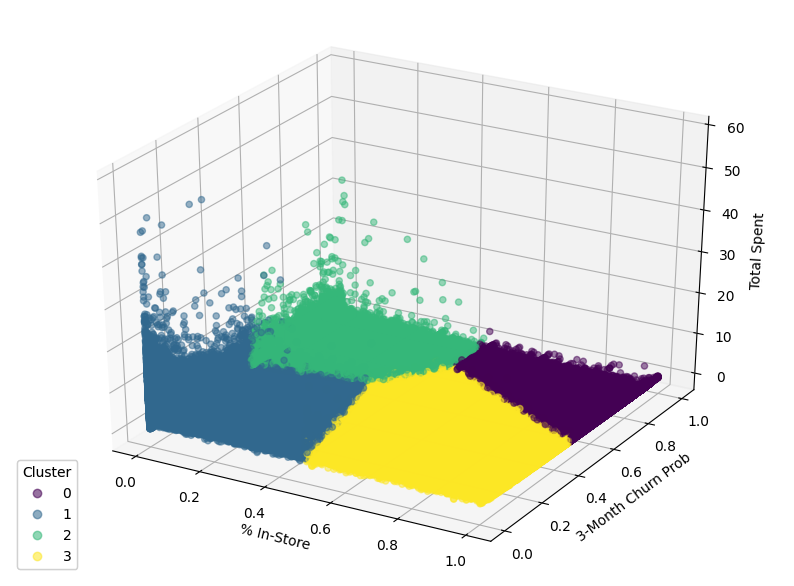

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(df_cust_new['perc_instore'], df_cust_new['churn_proba_3M'], 
           df_cust_new['total_spent'], c=df_cust_new['clusters'], 
           alpha=0.5)
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
ax.add_artist(legend)
# ax.legend()
ax.set_xlabel('% In-Store',  rotation=150)
ax.set_ylabel('3-Month Churn Prob')
ax.set_zlabel(r'Total Spent', rotation=60)
plt.show()


In [ ]:
df_cust_new.head()

,customer_id,FN,Active,age,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,fashion_news_frequency_Regularly,num_instore,...,price_divided,price_ladies_acc,price_ladies,price_lingeries,price_mens,price_sport,total_spent_norm,churn_proba_3M,churn_proba_6M,clusters
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,49.0,1,0,0,0,0,9.0,...,0.052932,0.000000,0.440559,0.000000,0.035576,0.000000,0.011252,0.458544,0.401635,3
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,25.0,1,0,0,0,0,5.0,...,0.826797,0.230407,0.603051,0.829898,0.000000,0.022017,0.045113,0.081589,0.010196,1
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,24.0,1,0,0,0,0,0.0,...,0.030492,0.000000,0.225322,0.201593,0.186373,0.061000,0.012220,0.375922,0.248316,1
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,54.0,1,0,0,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.060983,0.001057,0.897181,0.817560,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,52.0,1,0,0,0,1,2.0,...,0.000000,0.000000,0.246085,0.169407,0.000000,0.054203,0.008144,0.349701,0.203179,1


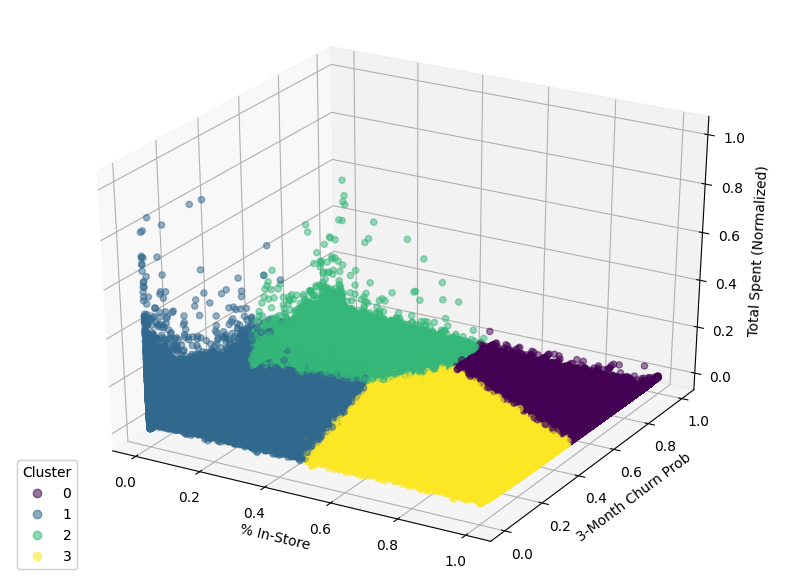

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(df_cust_new['perc_instore'], df_cust_new['churn_proba_3M'], 
           df_cust_new['total_spent_norm'], c=df_cust_new['clusters'], 
           alpha=0.5)
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
ax.add_artist(legend)
# ax.legend()
ax.set_xlabel('% In-Store',  rotation=150)
ax.set_ylabel('3-Month Churn Prob')
ax.set_zlabel(r'Total Spent (Normalized)', rotation=60)
plt.show()

## Output

In [ ]:
from google.colab import files

In [ ]:
# export df to csv
df_cust_new.to_csv('df_cust_segments.csv', encoding = 'utf-8-sig', index=False)
files.download('df_cust_segments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>